# Geometric Interpretation of CCA
Canonical correlation analysis (CCA) is a popular data driven method that can be used to infer the relationship between two sets multivariate signals. In many ways, CCA resembles principal component analysis (PCA). While PCA finds the directions of maximum variance of a collection of samples from multivariate signals, CCA finds the directions of maximum correlation between two collections of samples from two separate multivariate signals. However, although it is easy to assign a geometric interpretation to the maximum variance property of prinicipal components, it is fairly difficult to deduce a similar interpretation for the maximum correlation property of CCA. 

Fortunately, an alternative interpretation of CCA can be derived, which not only provides a geometric understanding of the problem, but also can be used to explain the relationship between the number of samples and the statistical significance of the canonical correlation coefficient estimated by CCA. This interpretation is presented in [1], which I have paraphrazed in this document. I assume the reader has basic familiarity of CCA and its terminology. 

Let us consider $N$ data points from each of the two zero-mean random vectors ${\bf x}_1$ and ${\bf x}_2$ of dimension $p_1$ and $p_2$, respectively. Let ${\bf x} = [{\bf x}_1^T {\bf x}_2^T]^T$ be the $p$-dimensional random vector (where $p = p_1 + p_2$) obtained by stacking the two vectors and ${\bf X}$ be the $p\times N$ matrix containing all $N$ samples of ${\bf x}$. An alternative way of viewing the data is to interpret ${\bf X}$ as a collection of $p$ data points in the $N-1$-dimensional subspace\*. This first $p_1$ points in this $(N-1)$-dimensional space correspond to the first signal  ${\bf x}_1$ and the last $p_2$ points correspond to the second signal ${\bf x}_2$. Lets call these datasets in $R^{N-1}$ by the matrices ${\bf Y}_1$ and ${\bf Y}_2$, respectively. 

The first canonical coefficients of CCA (CCA eigenvectors) for ${\bf x}_1$, called ${\bf w}^1_1$, can be viewed as linear combinations of the $p_1$ vectors in ${\bf Y}_1$. Similarly, ${\bf w}^1_2$ are the coefficients for ${\bf Y}_2$. What we get from these linear combination is two $(N-1)$-dimensional vectors. CCA gurantees that the angle $\alpha_1$ between these two vectors is minmized. In other words, $corr({\bf w}^1_1{\bf X}_1,{\bf w}^1_2{\bf X}_2) = \cos(\alpha_1)$ is maximized. This concludes the description for the geometric interpretation presented in [1]. 

## Corollary
The special case where $\alpha_1=0$ implies that a linear combination of the points in ${\bf Y}_1$ and a linear combination of the points in ${\bf Y}_2$ exists that makes the resulting vectors parallel. We know this scenario to always be true when $N$ is small compared to $p_1$ and/or $p_2$. In other words, $p_1$ and $p_2$ are large enough to spane the $(N-1)$-dimenshional space.



\* Note that the sub-space in $(N-1)$-dimensional and not $N$-dimensional, because of the centering constraint (i.e., $mean({\bf x}) = 0$). In other words, we assume that the columns of ${\bf X}$ are centered. 



## Example 
Here we give a small example to illustrate the geometric interpretation. First, consider two sets of samples in $R^2$, both $2$-dimensional. 



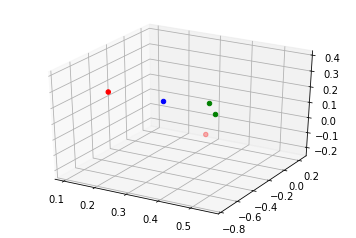

In [73]:
import numpy as np
from sklearn.cross_decomposition import CCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

p_1 = 1
p_2 = 2
N = 4
X_1 =  np.random.rand(N,p_1)
X_1 =  X_1 - X_1.mean(axis=0)[np.newaxis,:]
X_2 =  np.random.rand(N,p_2)
X_2 =  X_2 - X_2.mean(axis=0)[np.newaxis,:]

cca = CCA(n_components=1)
cca.fit(X_1, X_2)
w_1, w_2 = cca.transform(X_1, X_2)
w_1 = w_1/np.linalg.norm(w_1)
w_2 = w_2/np.linalg.norm(w_2)

## Plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_1[0,:],X_1[1,:],X_1[2,:],color='b')
ax.scatter(X_2[0,:],X_2[1,:],X_2[2,:],color='r')
ax.scatter(w_1[0,:],w_1[1,:],w_1[2,:],color='g')
ax.scatter(w_2[0,:],w_2[1,:],w_2[2,:],color='g')

plt.show()

## References
[1] Anderson, T. W., An introduction to multivariate statistical analysis. New York: Wiley, 1958.